In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing necessary Liberaries

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.feature_selection import f_classif
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


# Loading Dataset

In [47]:
dataset = pd.read_csv('/content/drive/MyDrive/codesoft/tested.csv')
dataset.shape

(418, 12)

# Viewing and Discovering the dataset

In [48]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [49]:
dataset.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,0.363636,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.481622,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,0.000000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,0.000000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [50]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Filling missing values

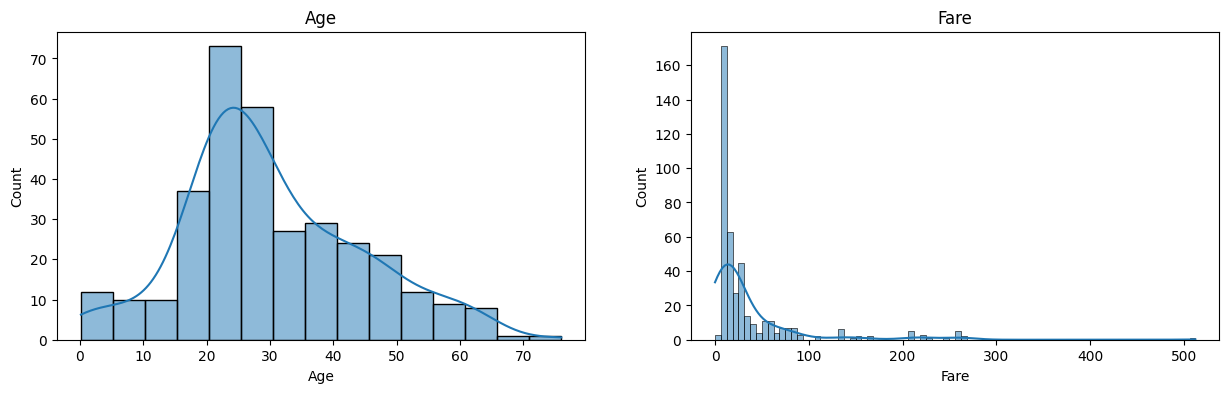

In [51]:
fig,ax=plt.subplots(1,2,figsize=(15,4))
sns.histplot(dataset['Age'],ax=ax[0],kde=True)
sns.histplot(dataset['Fare'],ax=ax[1],kde=True)
ax[0].set_title('Age')
ax[1].set_title('Fare')
plt.show()

###As the Age is close to normal I will replace missing values with the mean age, and due to that Fare is right skewed i will fiil missing values with the median.

In [52]:
dataset['Age'].fillna(dataset['Age'].mean(),inplace=True)
dataset['Fare'].fillna(dataset['Fare'].median(),inplace=True)

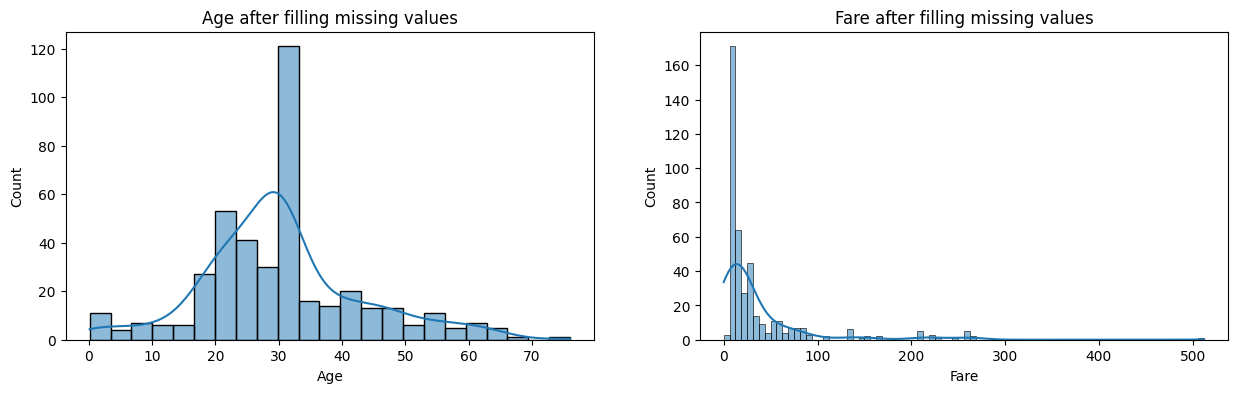

In [53]:
fig,ax=plt.subplots(1,2,figsize=(15,4))
sns.histplot(dataset['Age'],ax=ax[0],kde=True)
sns.histplot(dataset['Fare'],ax=ax[1],kde=True)
ax[0].set_title('Age after filling missing values')
ax[1].set_title('Fare after filling missing values')
plt.show()

In [54]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

## Replace categorical data with numerical values

In [55]:
dataset.Embarked.unique(),dataset.Sex.unique()

(array(['Q', 'S', 'C'], dtype=object), array(['male', 'female'], dtype=object))

In [56]:
dataset['Embarked'] = dataset["Embarked"].map({'Q':0, 'S':1, 'C':2}).astype(int)
dataset["Sex"] = dataset["Sex"].map({'female':1, 'male':0}).astype(int)

##Dropping unnecessary columns and also the Cabin column as most values are missing  




In [57]:
dataset.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace = True)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,0
1,1,3,1,47.0,1,0,7.0000,1
2,0,2,0,62.0,0,0,9.6875,0
3,0,3,0,27.0,0,0,8.6625,1
4,1,3,1,22.0,1,1,12.2875,1


## Find the correlation map

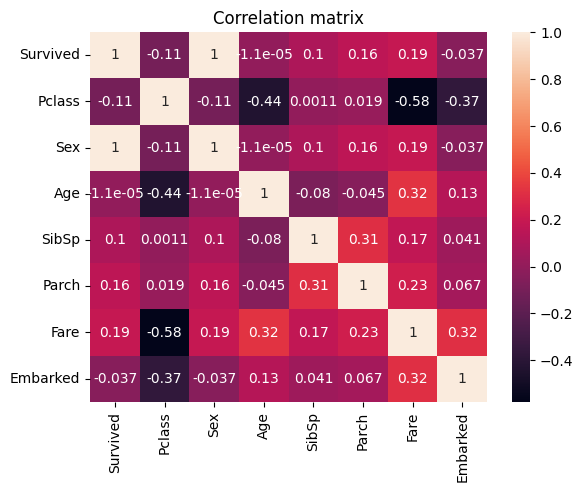

In [58]:
hm = sns.heatmap(dataset.corr(), annot = True)
hm.set(title = "Correlation matrix")
plt.show()

##From the Correlation map we can see that the "Sex" is a perfectly correlated feature that can be used alone to predict whether the passenger survives.
### Let's plot the count of survivors as per Sex.

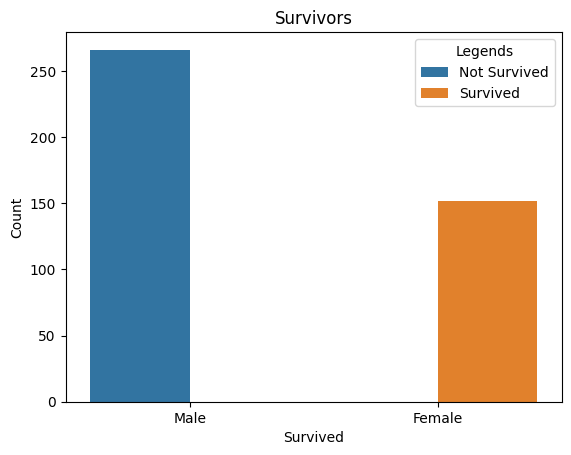

In [59]:
ax = sns.countplot(data = dataset, x="Survived", hue = "Survived")
ax.set_xlabel("Survived")
ax.set_ylabel("Count")
ax.set_title("Survivors")
ax.legend(title = "Legends", labels = ["Not Survived", "Survived"])
plt.xticks([0,1],["Male", "Female"])
plt.show()

## In our data only females can survive so we don't need any further processing

# Model Training and Testing

In [60]:
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:,1:].values,dataset.iloc[:,1].values,test_size=0.2,random_state=0)

log = make_pipeline(StandardScaler(),LogisticRegression(random_state = 0))
log_score = cross_val_score(log, X_train, y_train, cv=5)

DT = make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion = 'entropy', random_state = 0))
DT_score = cross_val_score(DT, X_train, y_train, cv=5)

print("Logistic Regression cross validation mean",log_score.mean())
print("Decision Tree cross validation mean: ",DT_score.mean())

y_log = log.fit(X_train,y_train).predict(X_test)
y_DT = DT.fit(X_train,y_train).predict(X_test)


Logistic Regression cross validation mean 1.0
Decision Tree cross validation mean:  1.0
